# 🏥 Predicting the Medical expenses should be on Medical Insurance using Machine Learning

In this notebook we're going through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Defination
The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

## 2. Data
The data is downloaded from Kaggle Blue Book for buldozers competition: https://www.kaggle.com/noordeen/insurance-premium-prediction

## 3. Evaluation 
The evaluation metric for this competition is the RSMLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation for this project https://www.kaggle.com/noordeen/insurance-premium-prediction

Note: The goal for the most regression metrics is to minimize the error. For example: our goal for this project will be to beat **Ashutosh Sir** `LinearRegression's` Accuracy.

## 4. Features
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
df.isnull().sum()/len(df)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

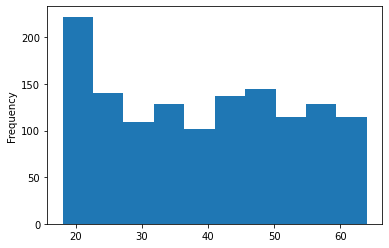

In [9]:
df.age.plot.hist();

In [10]:
df.age.max()

64

In [11]:
df.age.min()

18

In [12]:
data=df.copy()

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


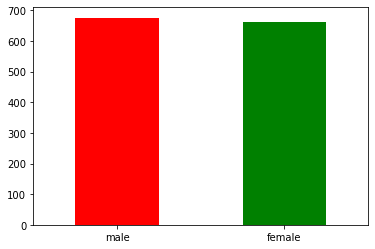

In [14]:
data["sex"].value_counts().plot(kind="bar",color=["red", "green"]);
plt.xticks(rotation=0);

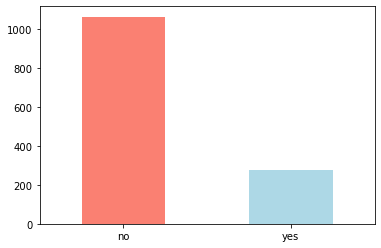

In [15]:
data["smoker"].value_counts().plot(kind="bar",color=["salmon", "lightblue"]);
plt.xticks(rotation=0);

**Let's make our object value to integer values**

In [16]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [18]:
df.sex.cat.codes

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Length: 1338, dtype: int8

In [19]:
for label,  content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,sex_is_missing,smoker_is_missing,region_is_missing
0,19,0,27.9,0,1,3,16884.92,False,False,False
1,18,1,33.8,1,0,2,1725.55,False,False,False
2,28,1,33.0,3,0,2,4449.46,False,False,False
3,33,1,22.7,0,0,1,21984.47,False,False,False
4,32,1,28.9,0,0,1,3866.86,False,False,False


In [21]:
df.drop(df.columns[[7, 8, 9]], axis = 1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


#### For safety of our dataset. Let's make a copy of our original data

In [23]:
data=df.copy()

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [25]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


In [27]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [28]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [29]:
data.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


## Visualizing correlation matrix

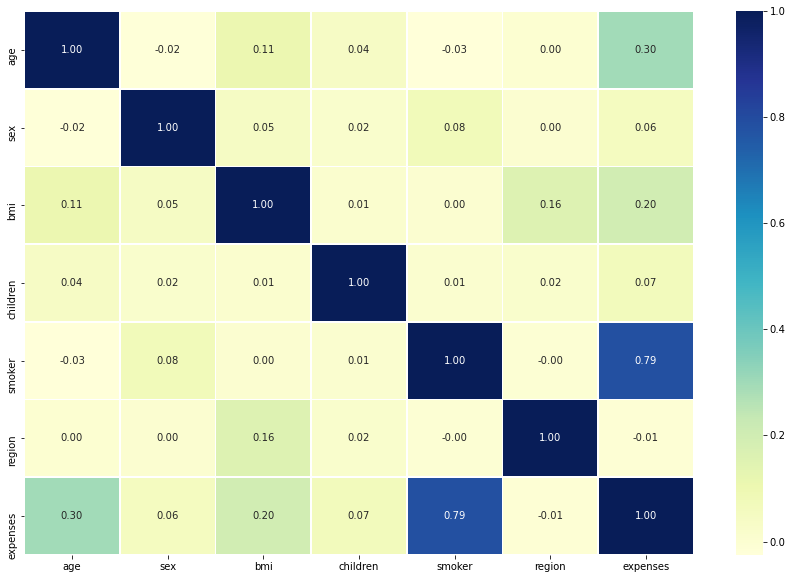

In [30]:
corr_matrix = data.corr()
fig,ax=plt.subplots(figsize=[15,10])
ax=sns.heatmap(corr_matrix,
               annot = True,
               linewidths = 0.5,
               fmt = (".2f"),
               cmap = "YlGnBu");

## 5. Modelling

Now that our data have no missing values. We are ready to go for our machine learning model


In [31]:
%%time
np.random.seed(42)
# Instantiate the model
lr=LinearRegression(n_jobs=-1)
# Fit the model
lr.fit(data.drop("expenses", axis=1), data["expenses"])

CPU times: user 7.17 ms, sys: 2.13 ms, total: 9.3 ms
Wall time: 6.87 ms


LinearRegression(n_jobs=-1)

In [32]:
lr.score(data.drop("expenses", axis=1), data["expenses"])

0.7507516902763371

**Question?** 

Why does the above matrix in not reliable

`Because we have fitted it correctly on the test data but when we were checking the score we asked score of the model on which it was trained.`

In [40]:
models={"LinearRegression":LinearRegression(),
        "RandomForestRegression":RandomForestRegressor()}

# Create a function to detrmine the scores and fit the models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different Scikit learning machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for name,model in models.items():
        #Fit the model into the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    # Return the model scores
    return model_scores

In [41]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

<ipython-input-40-089b6cea6d91>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


{'LinearRegression': 0.7694626233326285,
 'RandomForestRegression': 0.8526330029715168}

## Compare the baseline model's performances on the basis of `accuracy`

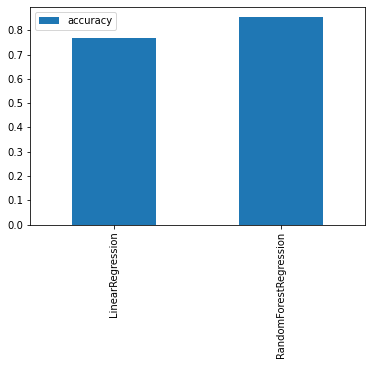

In [42]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

## Hypertuning For LinearRegression {LR}

In [43]:
np.random.seed(42)
lr=LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [44]:
# Create function to evaluate model on a few different levels:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def show_scores(model):
    train_preds = lr.predict(X_train)
    val_preds = lr.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [45]:
np.random.seed(42)

# Shuffle the data
data_one = data.sample(frac=1)

# Split into X & Y
X = data_one.drop("expenses", axis=1)
y = data_one["expenses"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(data_one)) ## This contains our 70% of the data
valid_split = round(train_split +0.15 *len(data_one)) ## This contains our 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# len(X_train), len(X_valid), len(X_test)

model=LinearRegression({'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True})
model.fit(X_train, y_train)

# Make baseline predictions
y_preds=model.predict(X_valid)

# Evaluate the regressor on validation set
baseline_metrics = show_scores(lr)

baseline_metrics

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass fit_intercept={'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True} as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{'Training MAE': 4122.664828224214,
 'Valid MAE': 4396.3183741326075,
 'Training R^2': 0.7640613830832065,
 'Valid R^2': 0.6513721527740728}

In [56]:
model.score(X_test,y_test)

0.8370479828043301

In [57]:
data={'age':25,'sex':0,'bmi':23.7,'children':2,'smoker':0,'region':3}

index=[1]

new_cust=pd.DataFrame(data,index)

In [58]:
prediction_new_cust=model.predict(new_cust)

print("the insurance cost for new customer is", prediction_new_cust)

the insurance cost for new customer is [4838.6492]


## 6. Experimentation

If you haven't hit your goal of accuracy yet...ask yourself...

* Could you collect more data
* Could you try a better model?
* Could you improve the current models?

                                                   **********